<a href="https://colab.research.google.com/github/mbmarcin/ml_portfolio/blob/master/dbs_kme_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [5]:
X, y_true = make_blobs(n_samples=1000, centers=3, cluster_std=0.99, random_state=3042019)
df = pd.DataFrame(X, columns = ['f1', 'f2'])
df.head()


,f1,f2
0,-2.059805,-3.100144
1,-1.438699,-2.771644
2,-1.542172,-2.538683
3,-3.523410,3.810432
4,0.182640,-3.555730


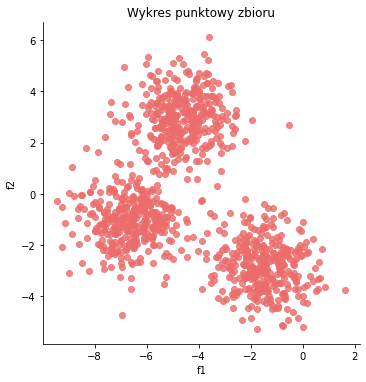

In [7]:
sns.lmplot(data=df, x='f1', y='f2', fit_reg=False, scatter_kws={"color": "#eb6c6a"}).set(title = 'Wykres punktowy zbioru')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


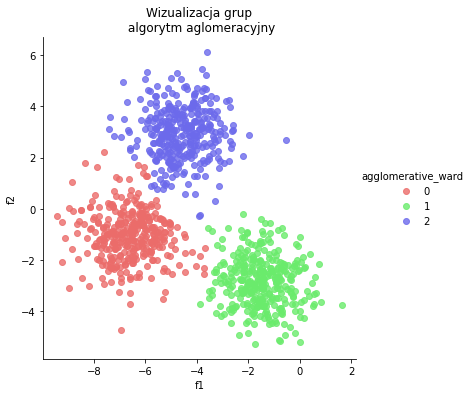

In [12]:
agglomerative = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=3).fit(df[['f1', 'f2']])
df['agglomerative_ward'] = agglomerative.labels_

sns.lmplot('f1', 'f2', data = df, hue = 'agglomerative_ward', fit_reg=False, palette = ['#eb6c6a', '#6aeb6c', '#6c6aeb']).set(title='Wizualizacja grup\n algorytm aglomeracyjny')
plt.show()


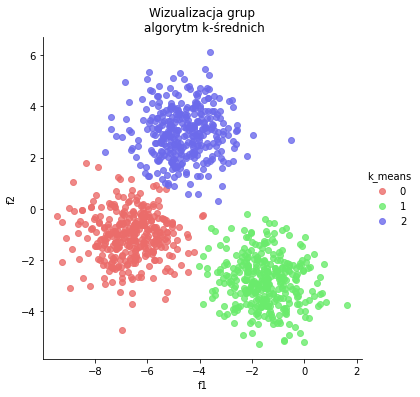

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['f1', 'f2']])
df['k_means'] = kmeans.predict(df[['f1', 'f2']])

sns.lmplot(data=df, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c', '#6c6aeb']).set(title='Wizualizacja grup\n algorytm k-średnich')
plt.show()

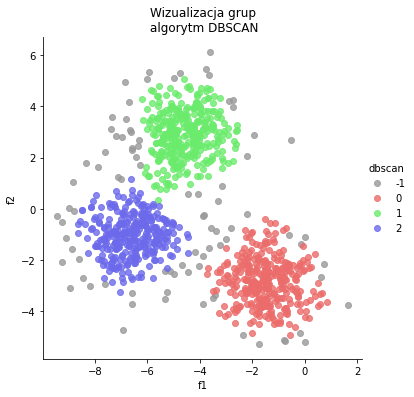

In [23]:
dbscan = DBSCAN(eps=0.5, min_samples=8)
dbscan.fit(df[['f1', 'f2']])
df['dbscan'] = dbscan.labels_

sns.lmplot(data=df, x='f1', y='f2', fit_reg=False, hue = 'dbscan', palette = ['#999999', '#eb6c6a', '#6aeb6c', '#6c6aeb']).set(title='Wizualizacja grup\n algorytm DBSCAN')
plt.show()

In [31]:
from sklearn.metrics import silhouette_score
print(f"agglomerative_ward :{silhouette_score(df[['f1', 'f2']], df['agglomerative_ward']).round(4)}")
print(f"k_means: {silhouette_score(df[['f1', 'f2']], df['k_means']).round(4)}")
print(f"dbscan: {silhouette_score(df[df.dbscan != -1][['f1', 'f2']], df[df.dbscan != -1]['dbscan']).round(4)}")

agglomerative_ward :0.6233
k_means: 0.6291
dbscan: 0.6653
